<a href="https://colab.research.google.com/github/SushiFou/ML-Business-Case-Project/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center"><b> Machine Learning Business Case Project </b></div>
---
<div align="center">Authors : Maxime Lepeytre | Soumaya Sabry | Alexandre Zajac | Olivier Boivin | Yann Kervella


<center>
<img src="https://github.com/SushiFou/ML-Business-Case-Project/blob/main/cover_image_tech.jpg?raw=1" width="800px"/>
</center>
</div>

<div align="center"><font color='red' size='12'> DON'T FORGET TO COMMIT CHANGES ON GITHUB FOLKS ! Good luck ! <font></div>

## Context

Vous êtes consultant data scientist dans une grande entreprise de conseil
française. Votre client est une entreprise qui génère beaucoup de données
mais pour le moment aucun modèle de Machine Learning n'a été mis en
place pour les exploiter. Elle a donc naturellement fait appel à vous.

L’entreprise en question exploite plus de 3 000 magasins dans 7 pays
européens. Actuellement, les directeurs de magasin sont chargés d’estimer
leurs ventes quotidiennes jusqu'à six semaines à l'avance. Les ventes des
magasins sont influencées par de nombreux facteurs, notamment les
promotions, la concurrence, les vacances scolaires, la saisonnalité et la
localité. Avec des milliers de gestionnaires individuels prédisant les ventes
en fonction de leur situation particulière, la précision des résultats peut
être très variable.

Avec votre équipe de consultant data scientists, vous récupérez les
données disponibles et allez mener un projet complet pour les exploiter et
répondre à la problématique. Vous devez préparer et soutenir, pour le 21
janvier 2021, un rendu sous forme de slides qui tirera les conclusions de
votre travail, incluant une démonstration présentant les résultats du
modèle de Machine Learning de manière visuelle à destination des
utilisateur finaux. Vous aurez 12 minutes pour présenter votre travail à
votre donneur d’ordre client.

## Requirements


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Graphical settings
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          'axes.labelsize' : 15,
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "axes.titlecolor": "w", 
          'figure.figsize': [20, 8], 
          'axes.prop_cycle': plt.cycler(color=color_list), 
          'figure.dpi' : 75, 
          'legend.fontsize': 10,
          'font.size': 15 
          }
plt.rcParams.update(params)

## Data Importation

### gdown if using colab

In [3]:
!gdown "https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY"

Downloading...
From: https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY
To: /content/store.csv
100% 45.0k/45.0k [00:00<00:00, 18.6MB/s]


In [4]:
!gdown "https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d"

Downloading...
From: https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d
To: /content/test.csv
100% 1.43M/1.43M [00:00<00:00, 44.3MB/s]


In [5]:
!gdown "https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n"

Downloading...
From: https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n
To: /content/train.csv
38.1MB [00:00, 143MB/s]


In [6]:
!gdown "https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV"

Downloading...
From: https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV
To: /content/variables.txt
100% 1.58k/1.58k [00:00<00:00, 1.12MB/s]


## Data Exploration

In [7]:
f = open("variables.txt", "r")
print(f.read())

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set
Store - a unique Id for each store
Sales - the turnover for any given day
Customers - the number of customers on a given day
Open - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of t

In [8]:
store_data = pd.read_csv('store.csv')
print(f'Dataframe shape : rows = {store_data.shape[0]}, columns = {store_data.shape[1]}')
store_data.head()

Dataframe shape : rows = 1115, columns = 10


Store StoreType  ... Promo2SinceYear    PromoInterval
0      1         c  ...             NaN              NaN
1      2         a  ...          2010.0  Jan,Apr,Jul,Oct
2      3         a  ...          2011.0  Jan,Apr,Jul,Oct
3      4         c  ...             NaN              NaN
4      5         a  ...             NaN              NaN

[5 rows x 10 columns]

In [9]:
train_data = pd.read_csv('train.csv', low_memory = False)
print(f'Dataframe shape : rows = {train_data.shape[0]}, columns = {train_data.shape[1]}')
train_data.head()

Dataframe shape : rows = 1017209, columns = 9


Store  DayOfWeek        Date  Sales  ...  Open  Promo  StateHoliday SchoolHoliday
0      1          5  2015-07-31   5263  ...     1      1             0             1
1      2          5  2015-07-31   6064  ...     1      1             0             1
2      3          5  2015-07-31   8314  ...     1      1             0             1
3      4          5  2015-07-31  13995  ...     1      1             0             1
4      5          5  2015-07-31   4822  ...     1      1             0             1

[5 rows x 9 columns]

In [10]:
test_data = pd.read_csv('test.csv')
print(f'Dataframe shape : rows = {test_data.shape[0]}, columns = {test_data.shape[1]}')
test_data.head()

Dataframe shape : rows = 41088, columns = 8


Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0

### Check Nan Values

In [11]:
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Only 3 Nan values in competition distance 

A lot of nan due to no competition registered for some tuples

In [12]:
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean(), inplace = True)

In [14]:
store_data.fillna(-1, inplace=True)

In [15]:
store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Check Outliers

In [16]:
store_data.describe()

Store  CompetitionDistance  ...  Promo2SinceWeek  Promo2SinceYear
count  1115.00000          1115.000000  ...      1115.000000       1115.00000
mean    558.00000          5404.901079  ...        11.595516       1029.75157
std     322.01708          7652.849306  ...        15.925223       1006.53886
min       1.00000            20.000000  ...        -1.000000         -1.00000
25%     279.50000           720.000000  ...        -1.000000         -1.00000
50%     558.00000          2330.000000  ...         1.000000       2009.00000
75%     836.50000          6875.000000  ...        22.000000       2012.00000
max    1115.00000         75860.000000  ...        50.000000       2015.00000

[8 rows x 7 columns]

Let's try to process the CompetitionDistance Outliers

In [17]:
from scipy import stats
store_data['CD_zscore'] = np.abs(stats.zscore(store_data['CompetitionDistance'].to_numpy()))
store_data.head()

Store StoreType Assortment  ...  Promo2SinceYear    PromoInterval  CD_zscore
0      1         c          a  ...             -1.0               -1   0.540551
1      2         a          a  ...           2010.0  Jan,Apr,Jul,Oct   0.632061
2      3         a          a  ...           2011.0  Jan,Apr,Jul,Oct   1.140623
3      4         c          c  ...             -1.0               -1   0.625525
4      5         a          a  ...             -1.0               -1   3.203525

[5 rows x 11 columns]

In [18]:
store_data_cleaned = store_data[store_data['CD_zscore'] < 3]
store_data_cleaned.describe()

Store  CompetitionDistance  ...  Promo2SinceYear    CD_zscore
count  1093.000000          1093.000000  ...      1093.000000  1093.000000
mean    559.150046          4725.402290  ...      1050.498628     0.608184
std     322.261812          5825.426321  ...      1005.830924     0.466511
min       1.000000            20.000000  ...        -1.000000     0.000000
25%     279.000000           700.000000  ...        -1.000000     0.349713
50%     560.000000          2280.000000  ...      2009.000000     0.553650
75%     839.000000          6360.000000  ...      2012.000000     0.673895
max    1115.000000         27650.000000  ...      2015.000000     2.908078

[8 rows x 8 columns]

In [25]:
store_data = store_data_cleaned.drop(columns='CD_zscore')
store_data.head()

Store StoreType  ... Promo2SinceYear    PromoInterval
0      1         c  ...            -1.0               -1
1      2         a  ...          2010.0  Jan,Apr,Jul,Oct
2      3         a  ...          2011.0  Jan,Apr,Jul,Oct
3      4         c  ...            -1.0               -1
5      6         a  ...            -1.0               -1

[5 rows x 10 columns]

In [20]:
train_data.describe()

Store     DayOfWeek  ...         Promo  SchoolHoliday
count  1.017209e+06  1.017209e+06  ...  1.017209e+06   1.017209e+06
mean   5.584297e+02  3.998341e+00  ...  3.815145e-01   1.786467e-01
std    3.219087e+02  1.997391e+00  ...  4.857586e-01   3.830564e-01
min    1.000000e+00  1.000000e+00  ...  0.000000e+00   0.000000e+00
25%    2.800000e+02  2.000000e+00  ...  0.000000e+00   0.000000e+00
50%    5.580000e+02  4.000000e+00  ...  0.000000e+00   0.000000e+00
75%    8.380000e+02  6.000000e+00  ...  1.000000e+00   0.000000e+00
max    1.115000e+03  7.000000e+00  ...  1.000000e+00   1.000000e+00

[8 rows x 7 columns]

In [21]:
test_data.describe()

Id         Store  ...         Promo  SchoolHoliday
count  41088.000000  41088.000000  ...  41088.000000   41088.000000
mean   20544.500000    555.899533  ...      0.395833       0.443487
std    11861.228267    320.274496  ...      0.489035       0.496802
min        1.000000      1.000000  ...      0.000000       0.000000
25%    10272.750000    279.750000  ...      0.000000       0.000000
50%    20544.500000    553.500000  ...      0.000000       0.000000
75%    30816.250000    832.250000  ...      1.000000       1.000000
max    41088.000000   1115.000000  ...      1.000000       1.000000

[8 rows x 6 columns]



# Bis's part

Seasonality

In [22]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

def sesonality(ts,date,val,title,y_label,nbr=6):
    date = date
    val = val
    ts = ts
    #new columns
    ts['Month'] = ts[date].dt.month
    ts['Year'] = ts[date].dt.year

    #pivot table
    pivot_table = pd.pivot_table(ts, values=val, index=['Month'], columns=['Year'], aggfunc=np.sum)
    pivot_table['Max'] = pivot_table.iloc[:,-6:-1].max(axis=1)
    pivot_table['Min'] = pivot_table.iloc[:,-7:-2].min(axis=1)
    pivot_table['5 Year Avg'] = pivot_table.iloc[:,-8:-3].mean(axis=1)

    #plot
    plot = go.Figure()
    # Set the colors for the lines
    colors = ['#17becf','#e377c2','#ff7f0e','#2ca02c','darkblue','firebrick']
    # Create x-axis labels for the months
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    data = pivot_table
    plot.add_trace(go.Scatter(x=months, y=data['Max'],
                              fill=None,
                              mode=None,
                              line_color='lightgray',showlegend=False
                              ))
    plot.add_trace(go.Scatter(x=months, y=data['Min'],
                              fill='tonexty',
                              mode=None,
                              line_color='lightgray', showlegend=False
                              ))
    plot.add_trace(go.Scatter(x=months, y=data['5 Year Avg'], name=str(nbr)+' Year Avg',
                              line=dict(color='black', width=4, dash='dot')))


    for i in range(nbr):
        index = -4-i
        plot.add_trace(go.Scatter(x=months, y=data.iloc[:,index], name=data.columns[index],
                                line=dict(color=colors[i], width=4)))
    plot.update_layout(title=title,
                      xaxis_title='Month',
                      yaxis_title= y_label,
                      template='plotly_white')
    plot.show()
    return pivot_table

In [23]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_store_2 = train_data[train_data['Store'] == 2]
_ = sesonality(train_data,'Date','Sales','Seso global','Sales',3)
_ = sesonality(train_store_2,'Date','Sales','Seso Store 2','Sales',3)

Decomposition de la TS

In [ ]:
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf


ts = train_data
cor = acf(ts.Sales)

fig, ax = plt.subplots(1, 1, figsize=(14,2))
ax.plot(cor)
ax.set_title("Autocorrélogramme")


plot_pacf(ts.Sales, lags=50)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts.Sales, freq=7)
res.plot()

Seaborn

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(store_data, hue="Store")

# Yann's Analysis

In [26]:
store_data.head()

Store StoreType  ... Promo2SinceYear    PromoInterval
0      1         c  ...            -1.0               -1
1      2         a  ...          2010.0  Jan,Apr,Jul,Oct
2      3         a  ...          2011.0  Jan,Apr,Jul,Oct
3      4         c  ...            -1.0               -1
5      6         a  ...            -1.0               -1

[5 rows x 10 columns]

In [27]:
train_data.head()

Store  DayOfWeek        Date  Sales  ...  Open  Promo  StateHoliday SchoolHoliday
0      1          5  2015-07-31   5263  ...     1      1             0             1
1      2          5  2015-07-31   6064  ...     1      1             0             1
2      3          5  2015-07-31   8314  ...     1      1             0             1
3      4          5  2015-07-31  13995  ...     1      1             0             1
4      5          5  2015-07-31   4822  ...     1      1             0             1

[5 rows x 9 columns]

In [28]:
combined_data = store_data.merge(train_data, on=['Store'])
combined_data.head()

Store StoreType Assortment  ...  Promo  StateHoliday  SchoolHoliday
0      1         c          a  ...      1             0              1
1      1         c          a  ...      1             0              1
2      1         c          a  ...      1             0              1
3      1         c          a  ...      1             0              1
4      1         c          a  ...      1             0              1

[5 rows x 18 columns]

In [32]:
def label_encoding(data):
  le = LabelEncoder()
  for column_name in data.columns:
      if data[column_name].dtype == object:
          data[column_name] = le.fit_transform(data[column_name])
      else:
          pass
  return data

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

x = combined_data.drop(columns=['Sales', 'PromoInterval'])
y = combined_data['Sales']

x = label_encoding(x)
x = StandardScaler().fit_transform(x)

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

principal component 1  principal component 2
0               1.924671               0.145559
1               1.971750               0.371382
2               2.012499               0.583089
3               2.080374               0.855295
4               2.155030               1.142625

In [47]:
finalDf = pd.concat([principalDf, combined_data], axis = 1)
finalDf.head()

principal component 1  principal component 2  ...  StateHoliday SchoolHoliday
0               1.924671               0.145559  ...             0             1
1               1.971750               0.371382  ...             0             1
2               2.012499               0.583089  ...             0             1
3               2.080374               0.855295  ...             0             1
4               2.155030               1.142625  ...             0             1

[5 rows x 20 columns]

In [91]:
import datetime

date_ref1 = datetime.datetime(2013, 1, 1)
date_ref2 = datetime.datetime(2015, 1, 31)
finalDf['Date'] = pd.to_datetime(finalDf['Date'])
test = finalDf[(finalDf['Date'] >= date_ref1) & (finalDf['Date'] <= date_ref2) & (finalDf['Open'] == 1)]
test.head()

principal component 1  principal component 2  ...  StateHoliday SchoolHoliday
181               1.654071              -1.096750  ...             0             0
182               1.864346              -0.111367  ...             0             0
183               1.896054               0.080174  ...             0             0
184               1.930927               0.278773  ...             0             0
185               1.979814               0.508630  ...             0             0

[5 rows x 20 columns]

100%|██████████| 15/15 [00:00<00:00, 163.66it/s]

<class 'list'>


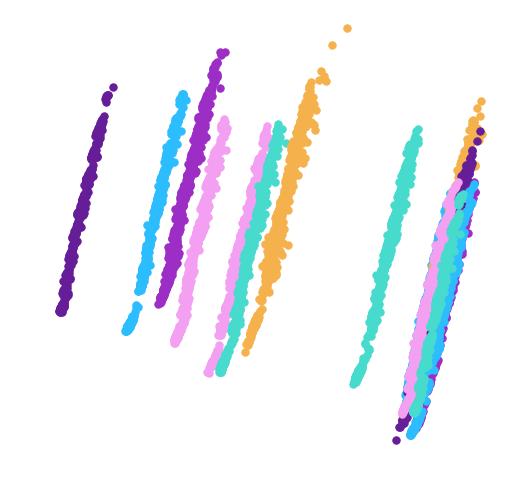

In [92]:
from tqdm import tqdm
plt.figure(figsize = (8,8))
color = ['r', 'b', 'g', 'black']
classes = np.unique(test['Store'])
classes = classes[:15].tolist()
for classes in tqdm(classes):
  indicesToKeep = test['Store'] == classes
  plt.scatter(test.loc[indicesToKeep, 'principal component 1']
            , test.loc[indicesToKeep, 'principal component 2']
            , s = 50)
# plt.scatter(test['principal component 1'], test['Sales'])
plt.show()

4it [00:00, 12.35it/s]


TypeError: ignored

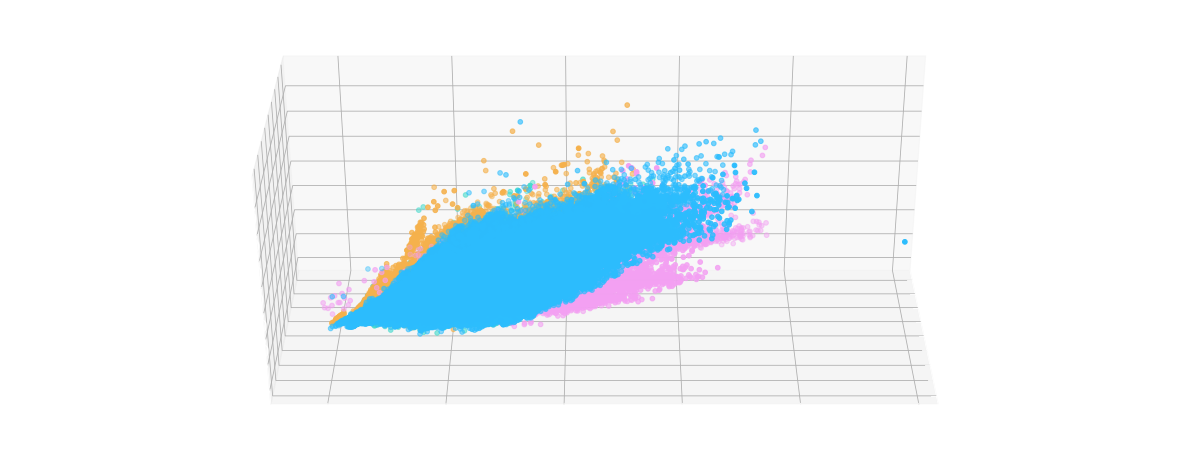

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color = ['r', 'b', 'g', 'black']
classes = np.unique(test['StoreType'])
for color, classes in tqdm(zip(color, classes)):
  indicesToKeep = test['StoreType'] == classes
  ax.scatter(test.loc[indicesToKeep, 'principal component 1'],
              test.loc[indicesToKeep, 'principal component 2'],
              test.loc[indicesToKeep, 'Sales'])
# plt.scatter(test['principal component 1'], test['Sales'])
for angle in range(0, 360):
    ax.view_init(30, angle)
    fig.draw()
    fig.pause(.001)
fig.show()


In [101]:
import plotly.express as px
color = ['r', 'b', 'g', 'black']
classes = np.unique(test['StoreType'])
for color, classes in tqdm(zip(color, classes)):
  indicesToKeep = test['StoreType'] == classes
  fig = px.scatter_3d(test.loc[indicesToKeep, 'principal component 1'],
              test.loc[indicesToKeep, 'principal component 2'],
              test.loc[indicesToKeep, 'Sales'])
fig.show()

4it [00:03,  1.04it/s]
